In [ ]:
#Import all the required packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D,MaxPooling2D,Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
 

In [ ]:
#Load the data from keras datasets
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [ ]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)



x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1)


In [ ]:
#Lets check how the image looks like in pixel format
index=0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

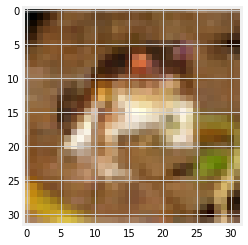

In [ ]:
#Lets check image after converting from array
img= plt.imshow(x_train[index])

In [ ]:
#Lets see what is the label of the image
print('Label is:',y_train[index])

Label is: [6]


In [ ]:
#Fetch all the labels in order from the CIFAR dataset from -- <https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c>
output_labels = ['airplane', 
                 'automobile', 
                 'bird', 
                 'cat', 
                 'deer', 
                 'dog', 
                 'frog', 
                 'horse', 
                 'ship', 
                 'truck']

In [ ]:
#Check the class_name at index==6
print(output_labels[y_train[index][0]])

frog


In [ ]:
#Convert the output target label into 10 labels using one hot encoding.
y_train_conv=to_categorical(y_train)
y_test_conv=to_categorical(y_test)

In [ ]:
#Check the new labels
print(y_train_conv)
print(y_test_conv)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
#Normalize the input pixels between 0 and 1
x_train=x_train/255
y_train=y_train/255

In [ ]:
#Check the normalized pixel values for image at index 0
x_train[0][0][0]

array([0.23137255, 0.24313725, 0.24705882])

In [ ]:
#Create the model architecture:

#Create a sequential model instance
model = Sequential()

#Add the first Covolution Layer
model.add( Conv2D(64, (5,5), activation='relu', input_shape=(32,32,3)) )

#Add first Pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Add the second Covolution Layer
model.add(Conv2D(64,(5,5),activation='relu'))

#Add second Pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Add a flattening layer
model.add(Flatten())

#Add first fully connected layer
model.add(Dense(1000,activation='relu',))

#Add first dropout layer
model.add(Dropout(0.5))

#Add second fully connected layer
model.add(Dense(500,activation='relu',))

#Add third fully connected layer
model.add(Dense(10,activation='softmax',))




In [ ]:
#Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
#Train the model
performance= model.fit(x_train,y_train_conv, batch_size=256, epochs=10,validation_split=0.2 )

Epoch 1/10
157/157 [==============================] - 10s 15ms/step - loss: 1.9032 - accuracy: 0.2856 - val_loss: 1.5400 - val_accuracy: 0.4428
Epoch 2/10
157/157 [==============================] - 2s 12ms/step - loss: 1.3974 - accuracy: 0.4924 - val_loss: 1.2765 - val_accuracy: 0.5555
Epoch 3/10
157/157 [==============================] - 2s 12ms/step - loss: 1.1986 - accuracy: 0.5766 - val_loss: 1.0896 - val_accuracy: 0.6131
Epoch 4/10
157/157 [==============================] - 2s 12ms/step - loss: 1.0619 - accuracy: 0.6199 - val_loss: 1.0331 - val_accuracy: 0.6344
Epoch 5/10
157/157 [==============================] - 2s 12ms/step - loss: 0.9690 - accuracy: 0.6563 - val_loss: 0.9935 - val_accuracy: 0.6499
Epoch 6/10
157/157 [==============================] - 2s 12ms/step - loss: 0.8995 - accuracy: 0.6821 - val_loss: 0.9488 - val_accuracy: 0.6722
Epoch 7/10
157/157 [==============================] - 2s 12ms/step - loss: 0.8266 - accuracy: 0.7086 - val_loss: 0.9193 - val_accuracy: 0.679

In [ ]:
#Evaluate the model loss and accuracy using the test data set
model.evaluate(x_test,y_test_conv)

313/313 [==============================] - 1s 3ms/step - loss: 242.5677 - accuracy: 0.5366


[242.5677490234375, 0.5365999937057495]

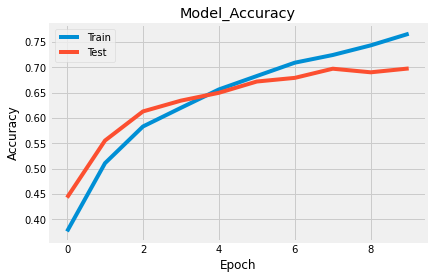

In [ ]:
#visualize model accuracy
plt.plot(performance.history['accuracy'])
plt.plot(performance.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='best')
plt.show()


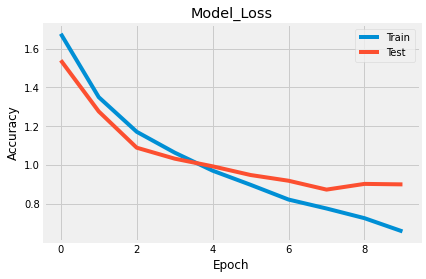

In [ ]:
#visualize model loss
plt.plot(performance.history['loss'])
plt.plot(performance.history['val_loss'])
plt.title('Model_Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='best')
plt.show()

In [ ]:
#Test the model with an example:
#Import new image to collab
from google.colab import files
uploaded =files.upload()


Saving f1.jpeg to f1.jpeg


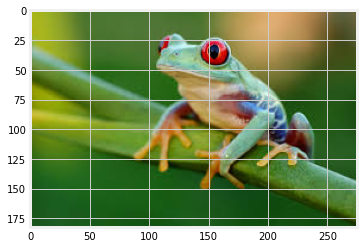

In [ ]:
# Read Images 
new_img = plt.imread('f1.jpeg') 
  
# Output Images 
plt.imshow(new_img) 

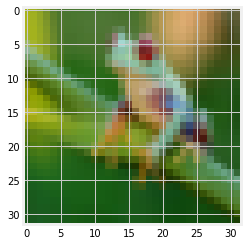

In [ ]:
#resize the image
from skimage.transform import resize
resized_image=resize(new_img,(32,32,3))
img = plt.imshow(resized_image)

In [ ]:
prediction = model.predict(np.array([resized_image]))
prediction

array([[6.4916480e-03, 1.0018772e-03, 7.7156909e-02, 4.4283010e-02,
        2.1559414e-02, 4.1267794e-02, 8.0658150e-01, 8.3273242e-04,
        3.0529549e-04, 5.1991682e-04]], dtype=float32)

In [ ]:
labels = np.argmax(prediction, axis=-1)    
print(labels[0])


6


In [ ]:
#Print the label of the image
print(output_labels[labels[0]])

frog
